Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
pd.set_option('display.max_columns', None)

#### Preprocessing of Data

In [4]:
data = pd.read_csv("insurance_claim_fraud.csv") 

In [5]:
data.head(50)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [6]:
data.shape

(1000, 40)

In [7]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We can see that the Column '_c39' have 100% missing values.

It is DROPPABLE.

Besides that we have to check the other columns also. As because while going through the Dataframe we have seen some columns with '?' mark which also mean there is missing values.

But we will do that after Feature Selection.

In [8]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
# Dropping the Columns that is not necessary for Prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

data.drop(to_drop, inplace = True, axis = 1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [12]:
data.head(50)

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N
5,256,39,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,unmarried,0,0,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,19,3,NO,0,2,NO,64100,6410,6410,51280,Y
6,137,34,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,0,3,?,0,0,?,78650,21450,7150,50050,N
7,165,37,100/300,1000,1137.03,0,MALE,Associate,tech-support,unmarried,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Police,23,3,?,2,2,YES,51590,9380,9380,32830,N
8,27,33,100/300,500,1442.99,0,FEMALE,PhD,other-service,own-child,0,0,Single Vehicle Collision,Front Collision,Total Loss,Police,21,1,NO,1,1,YES,27700,2770,2770,22160,N
9,212,42,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,wife,0,-39300,Single Vehicle Collision,Rear Collision,Total Loss,Other,14,1,NO,2,1,?,42300,4700,4700,32900,N


Now observing the data again after dropping the useless columns we see that there are some 3 columns 'collision_type','property_damage' and 'police_report_available' have missing values with '?' notation.

In [13]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

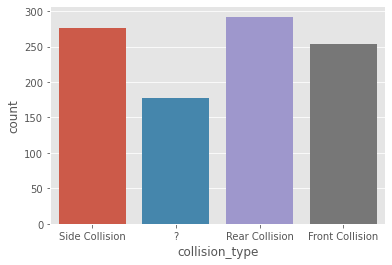

In [14]:
sns.countplot(data['collision_type']);

In [15]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

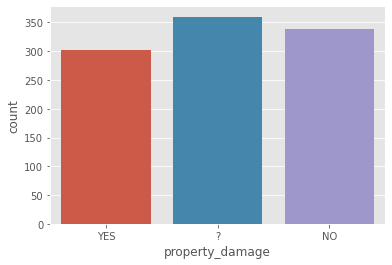

In [16]:
sns.countplot(data['property_damage']);

In [17]:
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

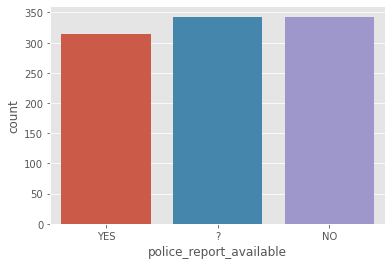

In [18]:
sns.countplot(data['police_report_available']);

It is very much evident that if we simply drop all the data points with '?' notation, we wil loose a great number of data points and our model may not capture the real picture.

So, it would be wiser on our part that instead of dropping the data we impute with something meaningful.

##### Filling Missing Values

In [19]:
data = data.replace('[?]', np.NaN , regex=True)

In [20]:
for col in ['collision_type', 'property_damage', 'police_report_available']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [21]:
data.head(50)

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N
5,256,39,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,unmarried,0,0,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,19,3,NO,0,2,NO,64100,6410,6410,51280,Y
6,137,34,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,0,3,NO,0,0,NO,78650,21450,7150,50050,N
7,165,37,100/300,1000,1137.03,0,MALE,Associate,tech-support,unmarried,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Police,23,3,NO,2,2,YES,51590,9380,9380,32830,N
8,27,33,100/300,500,1442.99,0,FEMALE,PhD,other-service,own-child,0,0,Single Vehicle Collision,Front Collision,Total Loss,Police,21,1,NO,1,1,YES,27700,2770,2770,22160,N
9,212,42,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,wife,0,-39300,Single Vehicle Collision,Rear Collision,Total Loss,Other,14,1,NO,2,1,NO,42300,4700,4700,32900,N


In [22]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [23]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00


In [24]:
data.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449


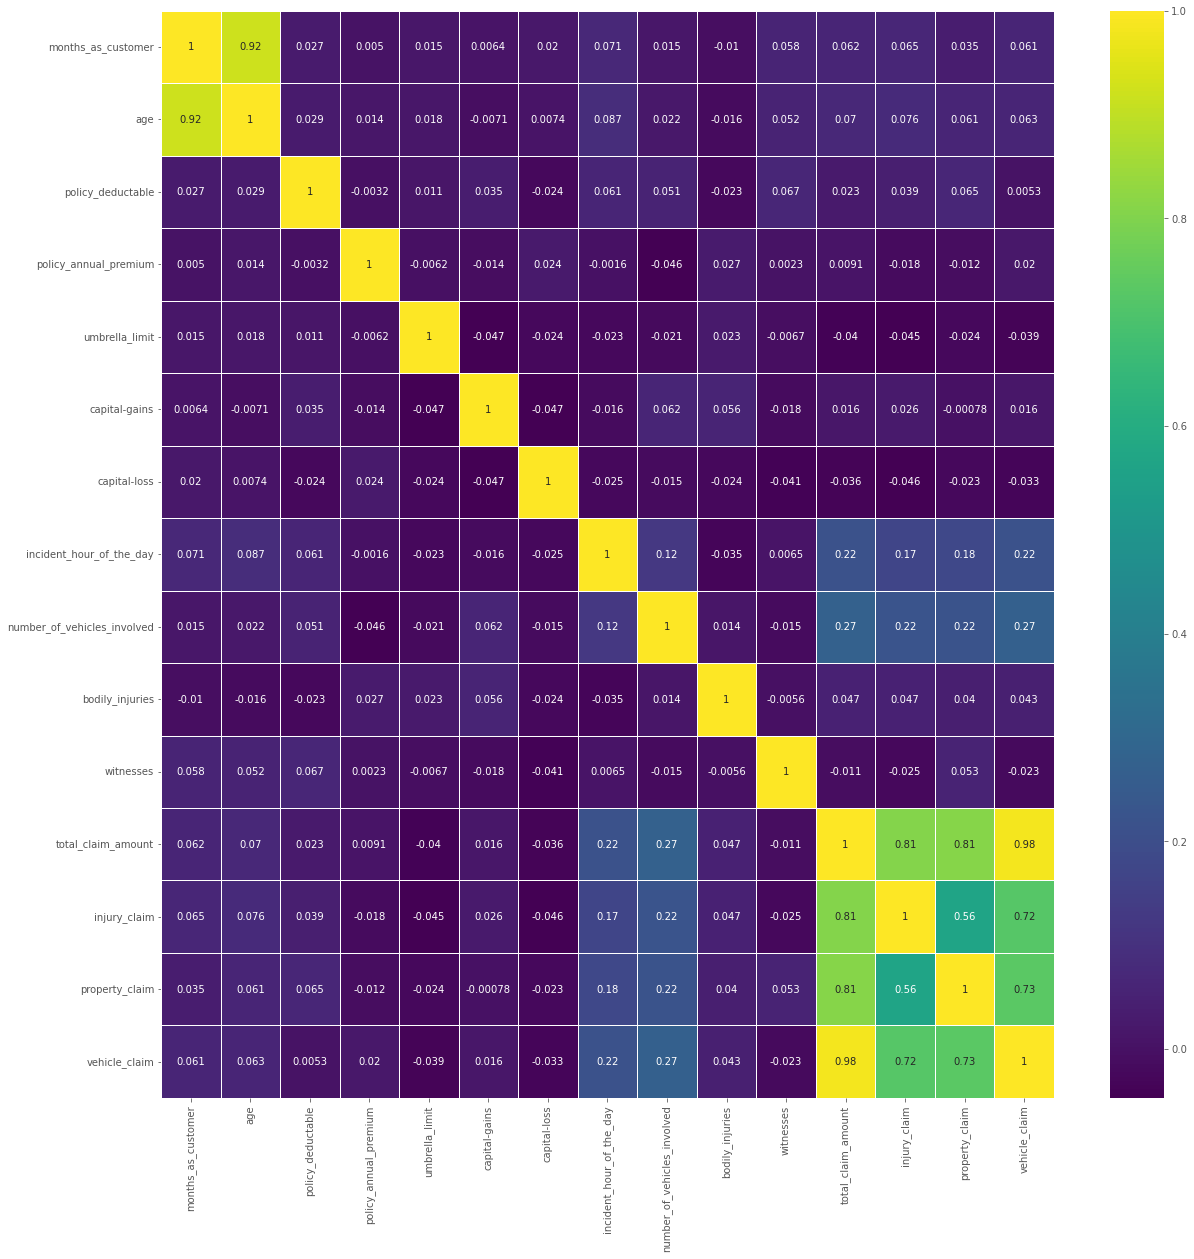

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt = '.2g', linewidth = 1, cmap='viridis')
plt.show()

We see some high correlation between some variables like - 'Injury_claim' and 'property_claim' with 'total_claim_amount' etc.

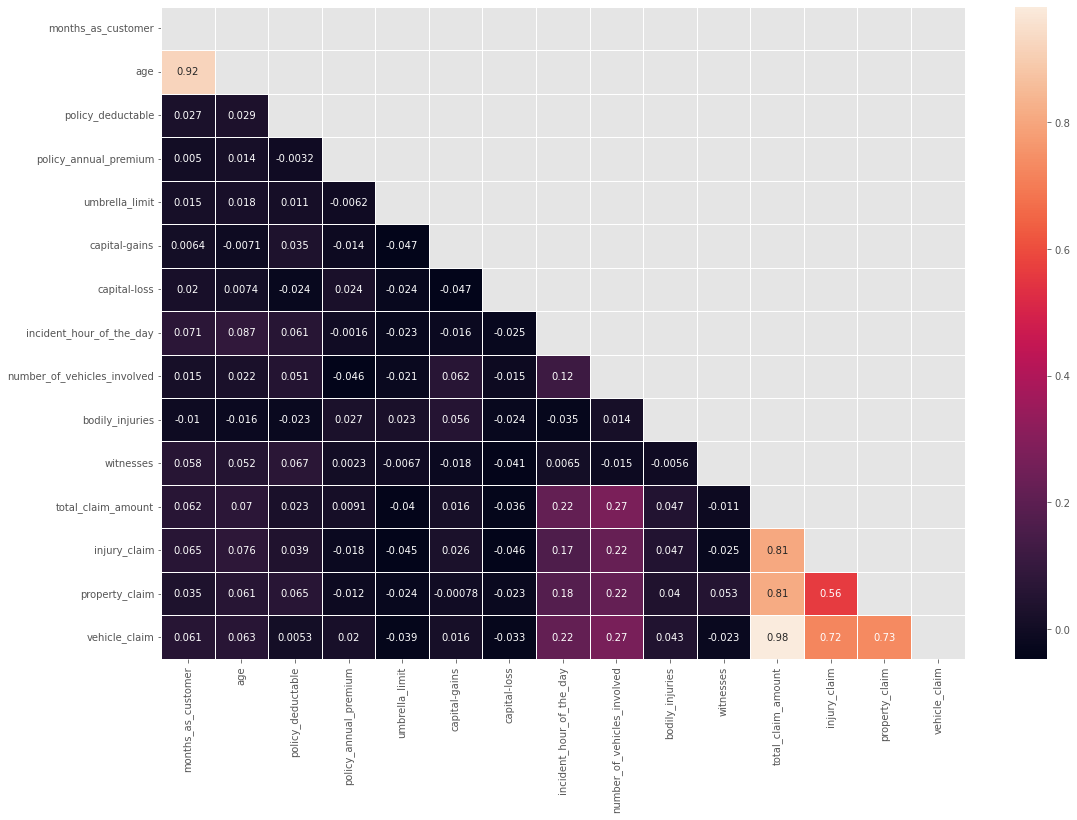

In [26]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

mask = np.triu(np.ones_like(data.corr(), dtype = bool))

sns.heatmap(data = data.corr(), mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()


From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_claim_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [27]:
data.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [28]:
data.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,1300,650,4550,N


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [30]:
# Separating the Features and Target columns

X = data.drop('fraud_reported', axis = 1)
Y = data['fraud_reported']

Encoding Categorical columns

In [31]:
cat_data = X.select_dtypes(include = ['object'])

In [32]:
cat_data.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [33]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   policy_csl               1000 non-null   object
 1   insured_sex              1000 non-null   object
 2   insured_education_level  1000 non-null   object
 3   insured_occupation       1000 non-null   object
 4   insured_relationship     1000 non-null   object
 5   incident_type            1000 non-null   object
 6   collision_type           1000 non-null   object
 7   incident_severity        1000 non-null   object
 8   authorities_contacted    1000 non-null   object
 9   property_damage          1000 non-null   object
 10  police_report_available  1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


In [34]:
# printing unique values of each column

for col in cat_data.columns:
    print(f"{col}: \n{cat_data[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [35]:
# OneHotEncoding for Categorical Data

cat_data = pd.get_dummies(cat_data, drop_first = True)

In [36]:
cat_data.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0


In [37]:
cat_data.shape

(1000, 41)

In [38]:
# Extracting the Numerical columns

num_data = X.select_dtypes(include = ['int64'])

In [39]:
num_data.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [40]:
# Combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_data, cat_data], axis = 1)

In [41]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0


In [42]:
X.shape

(1000, 53)

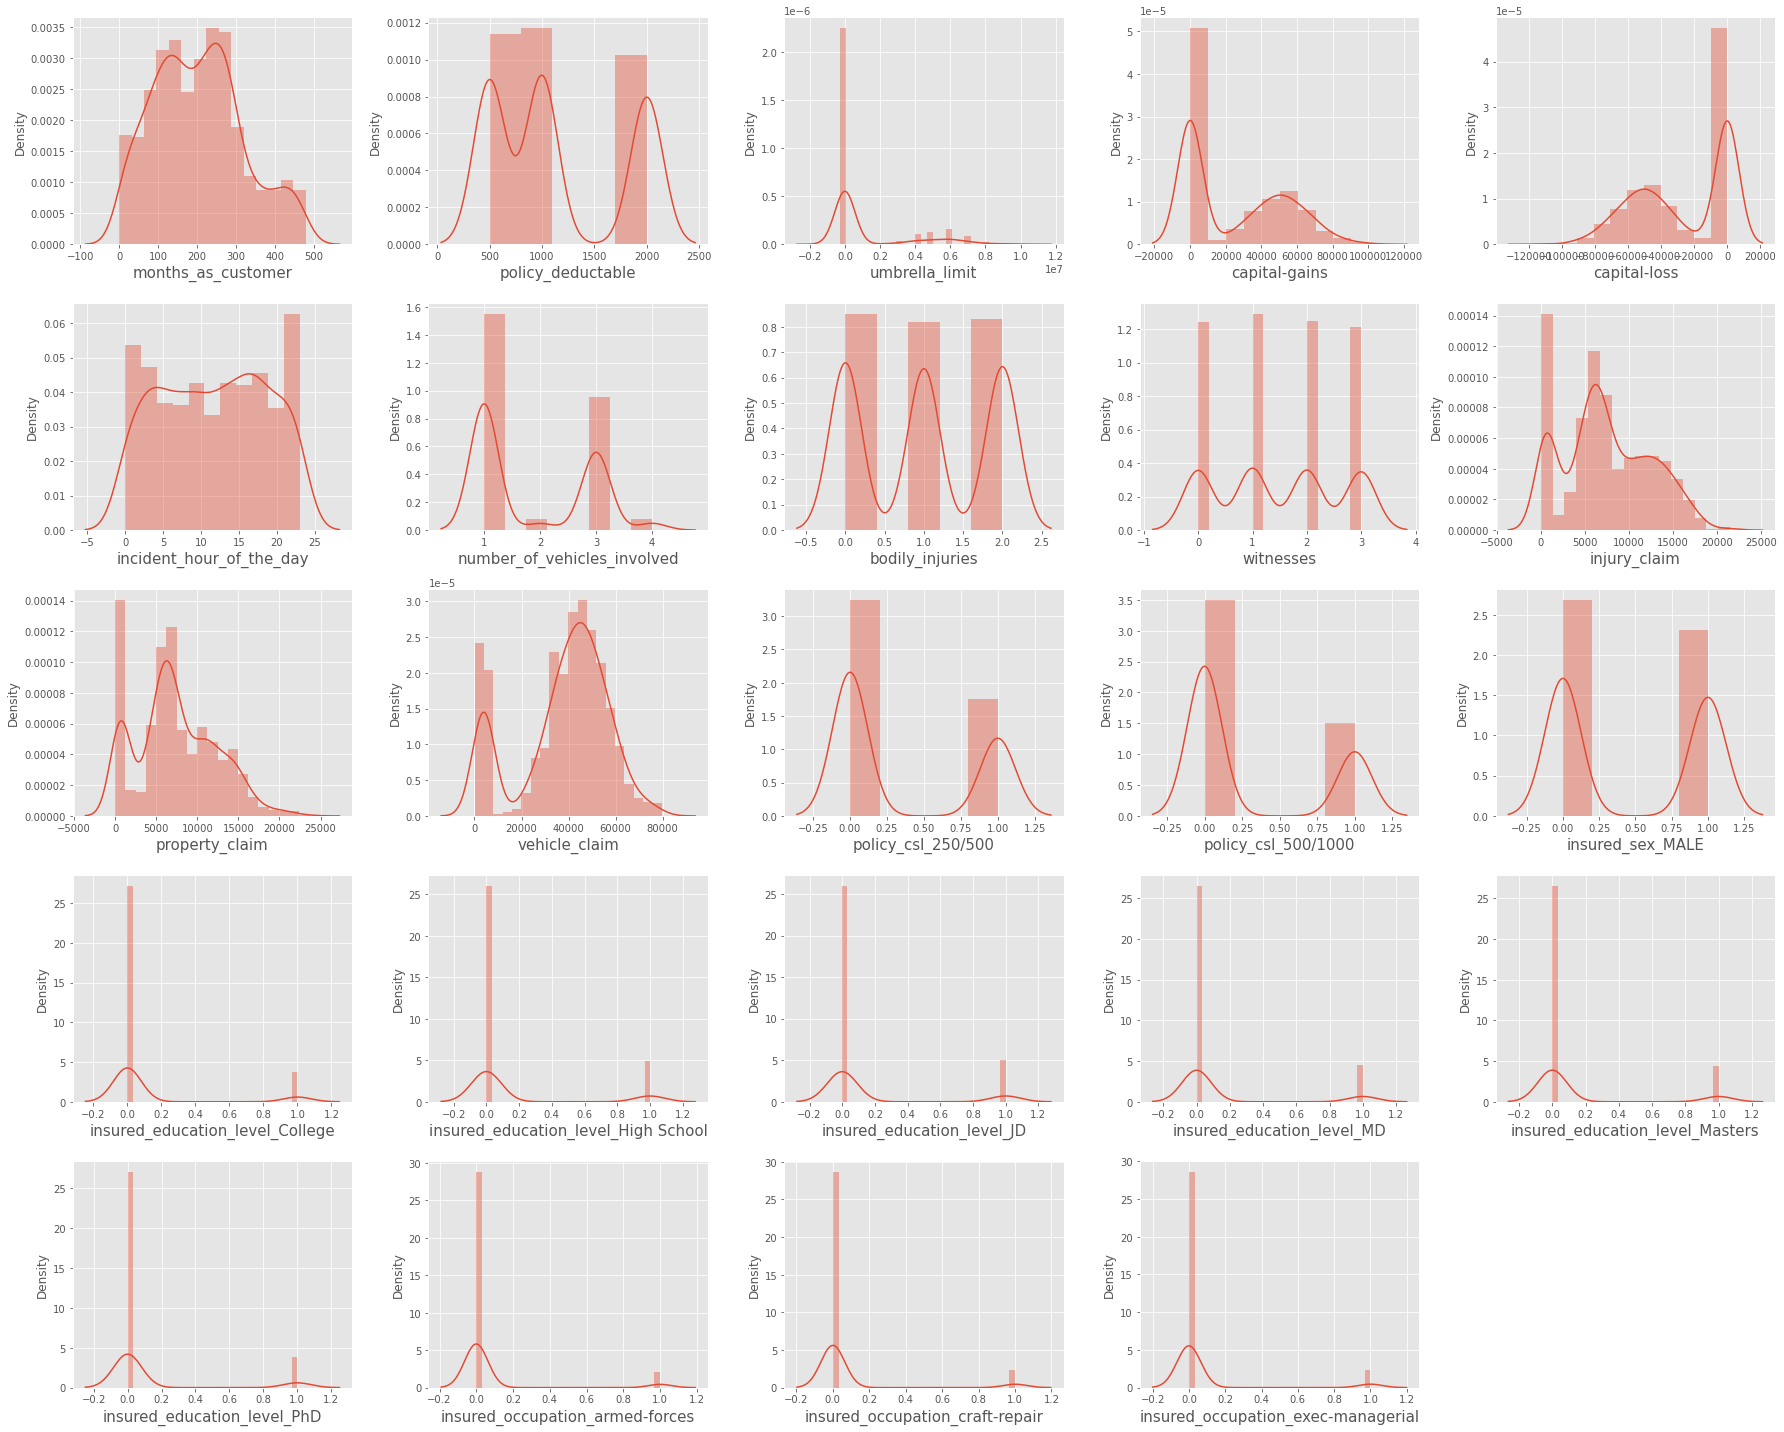

In [43]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Data looks good.

Now we check for the outliers

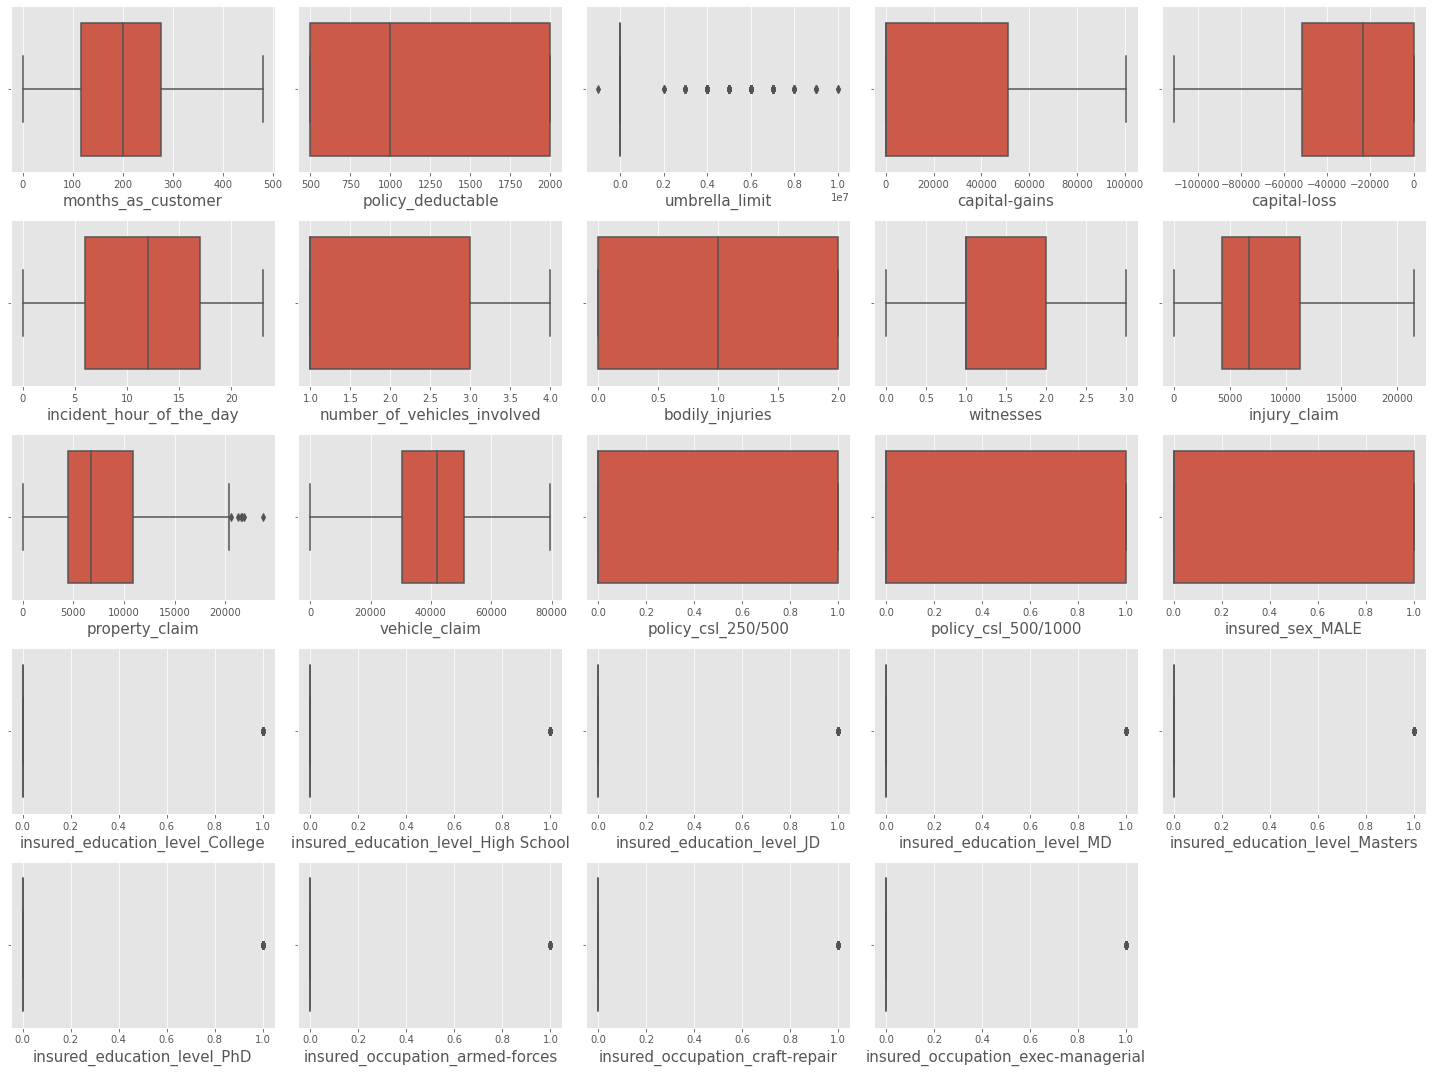

In [44]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns but we will scale numerical columns later

#### Splitting the data into Training set and Test set


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=100)

In [46]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
786,85,2000,0,50400,-61500,14,4,0,0,10740,5370,42960,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
152,104,500,0,31900,-44600,23,3,1,3,9780,9780,44010,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1
925,277,2000,0,0,-65500,4,1,2,3,430,860,2580,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
501,26,1000,0,0,-53700,0,1,0,2,9960,4980,34860,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
920,214,1000,0,57700,-43500,17,1,1,0,8040,4020,32160,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1


In [47]:
X.shape

(1000, 53)

In [48]:
num_data = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [49]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)

In [50]:
scaled_num_data = pd.DataFrame(data = scaled_data, columns = num_data.columns, index = X_train.index)
scaled_num_data.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
786,-1.024351,1.413279,-0.4985,0.897575,-1.236489,0.365898,2.158530,-1.188845,-1.330132,0.726329,-0.377743,0.313381
152,-0.857956,-1.047927,-0.4985,0.231715,-0.635015,1.688066,1.167773,0.019331,1.383192,0.528339,0.549237,0.368218
925,0.657114,1.413279,-0.4985,-0.916445,-1.378850,-1.103178,-0.813742,1.227507,1.383192,-1.400001,-1.325742,-1.795504
501,-1.541051,-0.227525,-0.4985,-0.916445,-0.958886,-1.690809,-0.813742,-1.188845,0.478751,0.565462,-0.459720,-0.109649
920,0.105384,-0.227525,-0.4985,1.160320,-0.595866,0.806621,-0.813742,0.019331,-1.330132,0.169482,-0.661512,-0.250660


In [51]:
X_train.drop(columns = scaled_num_data.columns, inplace = True)

In [52]:
X_train = pd.concat([scaled_num_data, X_train], axis = 1)

In [53]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
786,-1.024351,1.413279,-0.4985,0.897575,-1.236489,0.365898,2.158530,-1.188845,-1.330132,0.726329,-0.377743,0.313381,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
152,-0.857956,-1.047927,-0.4985,0.231715,-0.635015,1.688066,1.167773,0.019331,1.383192,0.528339,0.549237,0.368218,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1
925,0.657114,1.413279,-0.4985,-0.916445,-1.378850,-1.103178,-0.813742,1.227507,1.383192,-1.400001,-1.325742,-1.795504,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
501,-1.541051,-0.227525,-0.4985,-0.916445,-0.958886,-1.690809,-0.813742,-1.188845,0.478751,0.565462,-0.459720,-0.109649,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
920,0.105384,-0.227525,-0.4985,1.160320,-0.595866,0.806621,-0.813742,0.019331,-1.330132,0.169482,-0.661512,-0.250660,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1


### Modelling the Data

1. Support Vector Classifier

In [54]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

In [55]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(Y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print("-"*75)
print()
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")
print("-"*75)
print()

print(confusion_matrix(Y_test, Y_pred))
print("-"*75)
print()
print(classification_report(Y_test, Y_pred))

Training accuracy of Support Vector Classifier is : 0.8653333333333333
---------------------------------------------------------------------------

Test accuracy of Support Vector Classifier is : 0.756
---------------------------------------------------------------------------

[[189   0]
 [ 61   0]]
---------------------------------------------------------------------------

              precision    recall  f1-score   support

           N       0.76      1.00      0.86       189
           Y       0.00      0.00      0.00        61

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.76      0.65       250



2. Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, Y_train)

Y_pred = rand_clf.predict(X_test)

In [57]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, Y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print("-"*75)
print()
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print("-"*75)
print()

print(confusion_matrix(Y_test, Y_pred))
print("-"*75)
print()
print(classification_report(Y_test, Y_pred))

Training accuracy of Random Forest is : 0.9746666666666667
---------------------------------------------------------------------------

Test accuracy of Random Forest is : 0.736
---------------------------------------------------------------------------

[[170  19]
 [ 47  14]]
---------------------------------------------------------------------------

              precision    recall  f1-score   support

           N       0.78      0.90      0.84       189
           Y       0.42      0.23      0.30        61

    accuracy                           0.74       250
   macro avg       0.60      0.56      0.57       250
weighted avg       0.70      0.74      0.71       250

